# Import data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('weight-height.csv')

In [2]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


#  LabelEncoder

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()

In [5]:
le

LabelEncoder()

In [6]:
x = df.drop(['Weight'],axis=1)

In [7]:
x.Gender = le.fit_transform(x.Gender)

In [8]:
x

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971


In [9]:
y =df['Weight']

In [10]:
y.shape

(8555,)

#  VIS

Text(0.5, 1.0, 'Height-Weight Table')

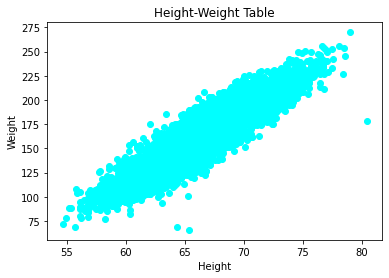

In [11]:
plt.scatter(df['Height'], df['Weight'],color='cyan')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Table')

# Train Test Data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =.30,random_state=1)

In [14]:
xtrain.shape

(5988, 2)

In [15]:
xtest

,Gender,Height
7154,0,65.068038
3258,1,70.824643
2188,1,68.663594
5609,0,65.987610
3186,1,70.901461
...,...,...
8004,0,58.963526
7644,0,66.613529
8521,0,67.895659
957,1,69.031063


In [16]:
xtest.shape

(2567, 2)

# Linear Regressiong

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr

LinearRegression()

In [20]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [21]:
pred = lr.predict(xtest)

In [22]:
pred

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

In [23]:
df['New-Weight'] = lr.predict(x)

In [24]:
df

,Gender,Height,Weight,New-Weight
0,Male,73.847017,241.893563,215.574352
1,Male,68.781904,162.310473,185.341329
2,Male,74.110105,212.740856,217.144694
3,Male,71.730978,220.042470,202.943984
4,Male,69.881796,206.349801,191.906445
...,...,...,...,...
8550,Female,60.483946,110.565497,116.468265
8551,Female,63.423372,129.921671,134.013329
8552,Female,65.584057,155.942671,146.910187
8553,Female,67.429971,151.678405,157.928220


In [25]:
lr.score(xtest,pred)

1.0

In [26]:
lr.score(xtest,ytest)

0.905995960709116

In [27]:
m = lr.coef_

In [28]:
m

array([19.34359322,  5.96887438])

In [29]:
c = lr.intercept_

In [30]:
c

-244.55280903255854

In [31]:
# y = m* 70 +c
# y

# MSC

In [32]:
from sklearn.metrics import mean_squared_error


In [33]:
msc = mean_squared_error(pred,ytest)

In [34]:
msc

99.67250998070035

#  VIZ

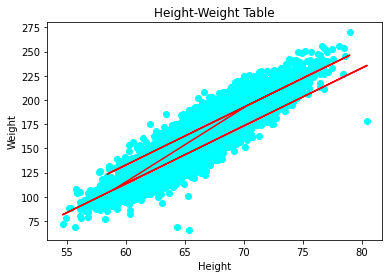

In [36]:

plt.scatter(df['Height'], df['Weight'],color='cyan')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Table')
plt.plot(df.Height ,df['New-Weight'],color='red')


#  KNN Regressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor
          

In [38]:
kr = KNeighborsRegressor(n_neighbors=5)

In [39]:
kr.fit(xtest,ytest)

KNeighborsRegressor()

In [40]:
kr.predict(xtest)

array([143.80711382, 193.14456428, 187.82876224, ..., 159.35995354,
       182.8023564 , 201.8815857 ])

In [41]:
pred = kr.predict(xtest)

In [42]:
df['KR_Weight'] = kr.predict(x)

In [43]:
df

,Gender,Height,Weight,New-Weight,KR_Weight
0,Male,73.847017,241.893563,215.574352,219.545376
1,Male,68.781904,162.310473,185.341329,184.127698
2,Male,74.110105,212.740856,217.144694,218.935282
3,Male,71.730978,220.042470,202.943984,210.324551
4,Male,69.881796,206.349801,191.906445,194.203009
...,...,...,...,...,...
8550,Female,60.483946,110.565497,116.468265,124.266404
8551,Female,63.423372,129.921671,134.013329,127.242003
8552,Female,65.584057,155.942671,146.910187,143.173654
8553,Female,67.429971,151.678405,157.928220,159.500588


# SCORE

In [44]:
kr.score(xtest,ytest)

0.9251862162519972

In [45]:
kr.score(xtest,pred)

1.0

# MSC_KNN

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mac =  mean_squared_error(ytest,pred)

In [48]:
mac

79.32507649211092

# Randomized Search CV

In [49]:
import numpy as np

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 15)]
grid_params = { 'n_neighbors' : n_estimators,
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}






In [50]:
# rng = range(1,20,4)

# for i in rng:
kr = KNeighborsRegressor()
    

In [51]:
kr

KNeighborsRegressor()

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:

rmcv = RandomizedSearchCV(estimator=kr, param_distributions=grid_params)


In [54]:
rmcv

RandomizedSearchCV(estimator=KNeighborsRegressor(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [50, 60, 71, 82, 92, 103,
                                                        114, 125, 135, 146, 157,
                                                        167, 178, 189, 200],
                                        'weights': ['uniform', 'distance']})

In [55]:
rmcv.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=KNeighborsRegressor(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [50, 60, 71, 82, 92, 103,
                                                        114, 125, 135, 146, 157,
                                                        167, 178, 189, 200],
                                        'weights': ['uniform', 'distance']})

In [56]:
rmcv.predict([[2,73.847017]])

array([215.65849337])

#  Accuracy_Parameters

In [57]:
df['KR_rmcv'] = rmcv.predict(x)

In [58]:
pred =rmcv.predict(xtest)

In [59]:
rmcv.score(xtest,ytest)

0.9012741299733953

In [60]:
df

,Gender,Height,Weight,New-Weight,KR_Weight,KR_rmcv
0,Male,73.847017,241.893563,215.574352,219.545376,215.658493
1,Male,68.781904,162.310473,185.341329,184.127698,184.799294
2,Male,74.110105,212.740856,217.144694,218.935282,216.674119
3,Male,71.730978,220.042470,202.943984,210.324551,202.456491
4,Male,69.881796,206.349801,191.906445,194.203009,192.921983
...,...,...,...,...,...,...
8550,Female,60.483946,110.565497,116.468265,124.266404,115.508710
8551,Female,63.423372,129.921671,134.013329,127.242003,133.745100
8552,Female,65.584057,155.942671,146.910187,143.173654,147.657582
8553,Female,67.429971,151.678405,157.928220,159.500588,159.107159


In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
mac = mean_squared_error(pred,ytest)

In [63]:
mac

104.67906847205381

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
grds = GridSearchCV(kr,grid_params,cv=5)

In [66]:
grds.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [50, 60, 71, 82, 92, 103, 114, 125, 135,
                                         146, 157, 167, 178, 189, 200],
                         'weights': ['uniform', 'distance']})

In [67]:
pred =rmcv.predict(xtest)

# MSC

In [68]:
mac = mean_squared_error(pred,ytest)

In [69]:
mac

104.67906847205381

In [70]:
df['KR_grds_search'] = rmcv.predict(x)

In [71]:
grds.score(xtest,ytest)

0.9036688664124584

In [72]:
df

,Gender,Height,Weight,New-Weight,KR_Weight,KR_rmcv,KR_grds_search
0,Male,73.847017,241.893563,215.574352,219.545376,215.658493,215.658493
1,Male,68.781904,162.310473,185.341329,184.127698,184.799294,184.799294
2,Male,74.110105,212.740856,217.144694,218.935282,216.674119,216.674119
3,Male,71.730978,220.042470,202.943984,210.324551,202.456491,202.456491
4,Male,69.881796,206.349801,191.906445,194.203009,192.921983,192.921983
...,...,...,...,...,...,...,...
8550,Female,60.483946,110.565497,116.468265,124.266404,115.508710,115.508710
8551,Female,63.423372,129.921671,134.013329,127.242003,133.745100,133.745100
8552,Female,65.584057,155.942671,146.910187,143.173654,147.657582,147.657582
8553,Female,67.429971,151.678405,157.928220,159.500588,159.107159,159.107159


# Import New data set

In [73]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('weight-height.csv')

In [74]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [75]:
x = df.drop(['Gender'],axis=1)

In [76]:
y =df['Gender']

# Train Test

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =.30,random_state=1)

In [79]:
xtrain.shape

(5988, 2)

# KNN Classifier

In [80]:
from sklearn.neighbors import  KNeighborsClassifier

In [81]:
ks = KNeighborsClassifier()

In [82]:
ks

KNeighborsClassifier()

In [83]:
ks.fit(xtrain,ytrain)

KNeighborsClassifier()

In [84]:
ks.predict([[73.847017,241.893563]])

array(['Male'], dtype=object)

In [85]:
df['KS'] = ks.predict(x)

# Prediction

In [86]:
df

,Gender,Height,Weight,KS
0,Male,73.847017,241.893563,Male
1,Male,68.781904,162.310473,Male
2,Male,74.110105,212.740856,Male
3,Male,71.730978,220.042470,Male
4,Male,69.881796,206.349801,Male
...,...,...,...,...
8550,Female,60.483946,110.565497,Female
8551,Female,63.423372,129.921671,Female
8552,Female,65.584057,155.942671,Female
8553,Female,67.429971,151.678405,Female


In [87]:
pred = ks.predict(xtest)

In [88]:
ks.score(xtest,ytest)

0.9146864043630697

# Confusion Matrix

In [89]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [90]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n      Female       0.90      0.89      0.90      1055\n        Male       0.92      0.93      0.93      1512\n\n    accuracy                           0.91      2567\n   macro avg       0.91      0.91      0.91      2567\nweighted avg       0.91      0.91      0.91      2567\n'

In [91]:
confusion_matrix(ytest,pred)

array([[ 938,  117],
       [ 102, 1410]], dtype=int64)

In [92]:
cm = confusion_matrix(ytest,pred)

# VIS

In [93]:
import seaborn as sns

<AxesSubplot:>

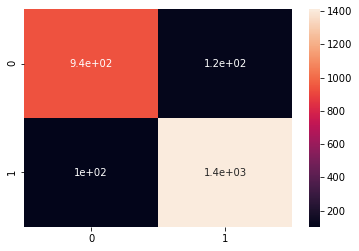

In [94]:
sns.heatmap(cm,annot=True)

In [95]:
tp , fn, fp,tn = confusion_matrix(ytest,pred).reshape(-1)

In [96]:
tp

938

In [97]:
fn

117

In [98]:
fp

102

In [99]:
tn

1410

In [100]:
accuracy = accuracy_score(ytest,pred)

In [101]:
accuracy

0.9146864043630697

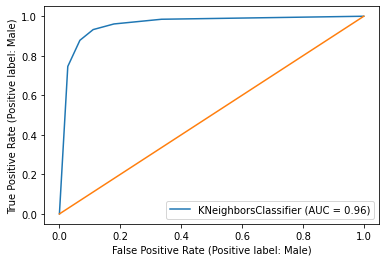

In [102]:
plot_roc_curve(ks,xtest,ytest)
plt.plot([0,1],[0,1])

# Tuning

In [103]:
import numpy as np

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 15)]

grid_params = { 'n_neighbors' : n_estimators,
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


# hp_candidates = [{'n_neighbors': n_estimators, 'weights': ['uniform','distance']}]



In [104]:
ks = KNeighborsClassifier()

In [105]:
rs = RandomizedSearchCV(ks, param_distributions=grid_params)

In [106]:
rs

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [50, 60, 71, 82, 92, 103,
                                                        114, 125, 135, 146, 157,
                                                        167, 178, 189, 200],
                                        'weights': ['uniform', 'distance']})

In [107]:
rs.fit(xtest,ytest)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [50, 60, 71, 82, 92, 103,
                                                        114, 125, 135, 146, 157,
                                                        167, 178, 189, 200],
                                        'weights': ['uniform', 'distance']})

In [108]:
rs.predict(xtest)

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [109]:
rs.score(x,y)

0.9388661601402688

In [110]:
pred = rs.predict(xtest)

df['R_S'] = rs.predict(x)

In [111]:
df

,Gender,Height,Weight,KS,R_S
0,Male,73.847017,241.893563,Male,Male
1,Male,68.781904,162.310473,Male,Female
2,Male,74.110105,212.740856,Male,Male
3,Male,71.730978,220.042470,Male,Male
4,Male,69.881796,206.349801,Male,Male
...,...,...,...,...,...
8550,Female,60.483946,110.565497,Female,Female
8551,Female,63.423372,129.921671,Female,Female
8552,Female,65.584057,155.942671,Female,Female
8553,Female,67.429971,151.678405,Female,Female
